In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline



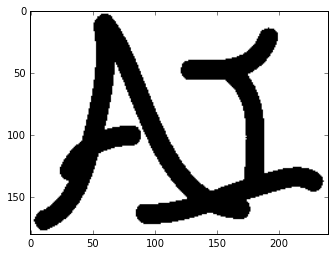

In [2]:
I=Image.open("in.png")
plt.imshow(I,plt.cm.gray)
plt.show()

In [3]:
def value_convert(x,translate):
    b=np.array(x)
    return np.vectorize(lambda x: translate[x])(b)

def flip_sign(x,density):
    a,b=len(x),np.array(x)
    for i in range(a): 
        p=np.random.rand()
        if  p < density:
            b[i]=-b[i]
    return b

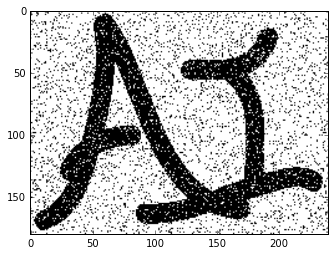

In [4]:
I_value=I.getdata()
I_change=value_convert(I_value,{0:-1,255:1})
I_flip=flip_sign(I_change,0.1)
plt.imshow(I_flip.reshape(np.array(I).shape),plt.cm.gray)
plt.show()

In [5]:
def Energy(alpha,beta,gamma):
    
    def valid_pixel(i,j,shape):
        return i>=0 and j>=0 and i<shape[0] and j<shape[1]
    
    def old_energy(x,y,i,j):
        old_value=x[i,j]
        new_value=old_value
        
        E=-alpha*new_value-beta*new_value*y[i,j]
        corner=[(0,1),(1,0),(-1,0),(0,-1)]
        pixel_value=[x[i+di,j+dj] for di,dj in corner if valid_pixel(i+di,j+dj,x.shape)]
        
        E=E-gamma*np.sum(pixel_value)*new_value
        
        return E
    
    def new_energy(x,y,i,j):
        old_value=x[i,j]
        new_value=-old_value
        
        E=-alpha*new_value-beta*new_value*y[i,j]
        corner=[(0,1),(1,0),(-1,0),(0,-1)]
        pixel_value=[x[i+di,j+dj] for di,dj in corner if valid_pixel(i+di,j+dj,x.shape)]
        
        E=E-gamma*np.sum(pixel_value)*new_value
        
        return old_value,new_value,E
        
    return old_energy,new_energy

In [6]:
old_energy,new_energy=Energy(0,2.1e-3,1e-3)
I_value=I.getdata()
I_change=value_convert(I_value,{0:-1,255:1})
I_flip=flip_sign(I_change,0.1)
y=I_flip.reshape(np.array(I).shape)
x=y
for ndx in np.ndindex(x.shape):
    old_e=old_energy(x,y,ndx[0],ndx[1])
    
    old_value,new_value,new_e=new_energy(x,y,ndx[0],ndx[1])
    
    if new_e<old_e:
        old_e,x[ndx]=new_e,new_value
    else:
        old_e,x[ndx]=old_e,old_value

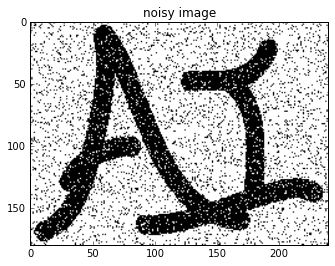

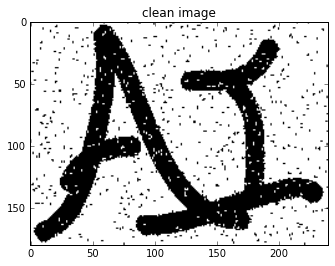

In [7]:
I_value=I.getdata()
I_change=value_convert(I_value,{0:-1,255:1})
I_flip=flip_sign(I_change,0.1)
plt.imshow(I_flip.reshape(np.array(I).shape),plt.cm.gray)
plt.title('noisy image')
plt.show()

plt.imshow(x,plt.cm.gray)
plt.title('clean image')

plt.show()

In [8]:
def median_val(x,i,j):
    def valid_pixel(i,j,shape):
        return i>=0 and j>=0 and i<shape[0] and j<shape[1]
    
    corner=[(k,l) for k in np.arange(-1,2) for l in np.arange(-1,2)]
    value=[x[i+di,j+dj] for di,dj in corner if valid_pixel(i+di,j+dj,x.shape)]
    return np.median(value)


In [9]:
I_value=I.getdata()
I_change=value_convert(I_value,{0:-1,255:1})
I_flip=flip_sign(I_change,0.1)
x=I_flip.reshape(np.array(I).shape)
myvalue=np.zeros(x.shape)
for ndx in np.ndindex(x.shape):
    myvalue[ndx]=median_val(x,ndx[0],ndx[1])

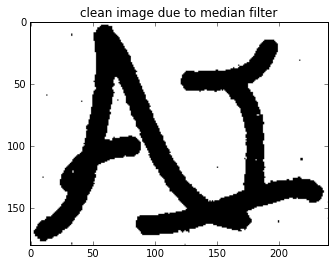

In [10]:
plt.imshow(myvalue,plt.cm.gray)
plt.title('clean image due to median filter')
plt.show()